In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix


In [2]:
df= pd.read_csv("new_file.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
df.shape

(6362620, 10)

In [4]:
df.isnull().value_counts()

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud
False  False  False   False     False          False           False     False           False           False      6362620
Name: count, dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

<Axes: xlabel='type', ylabel='amount'>

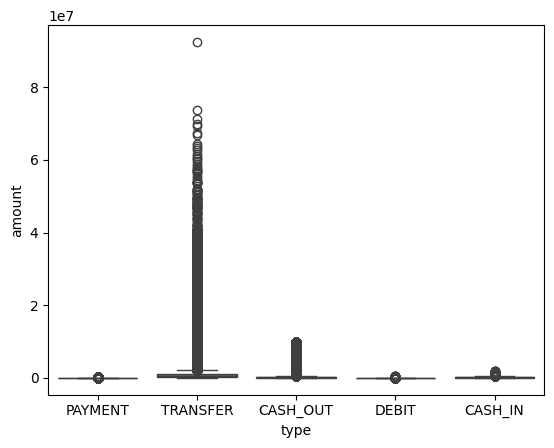

In [7]:
sns.boxplot(data = df , x= 'type' , y = 'amount')

<Axes: >

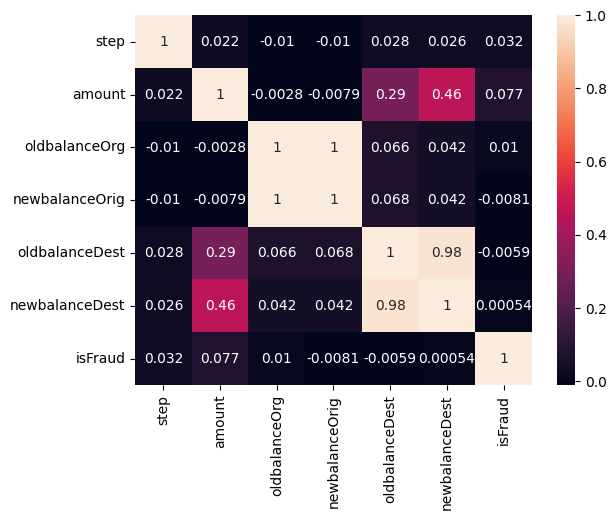

In [8]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

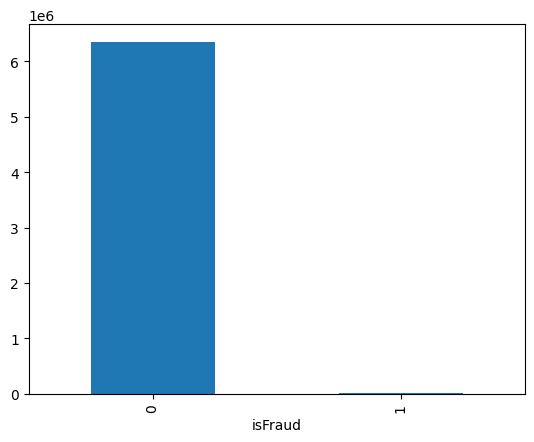

In [10]:
df['isFraud'].value_counts().plot(kind='bar')


<Axes: ylabel='amount'>

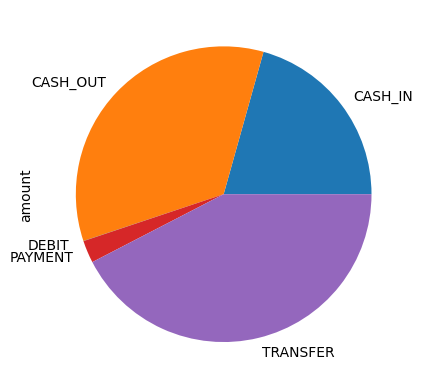

In [11]:
df.groupby('type')['amount'].sum().plot(kind='pie')

<Axes: xlabel='type'>

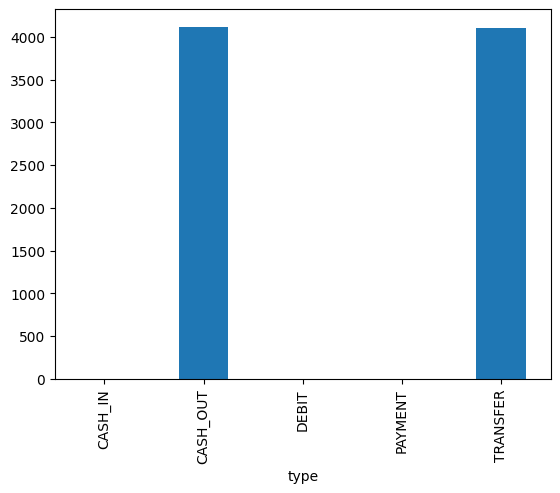

In [12]:

df.groupby('type')['isFraud'].sum().plot(kind = 'bar')

In [13]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

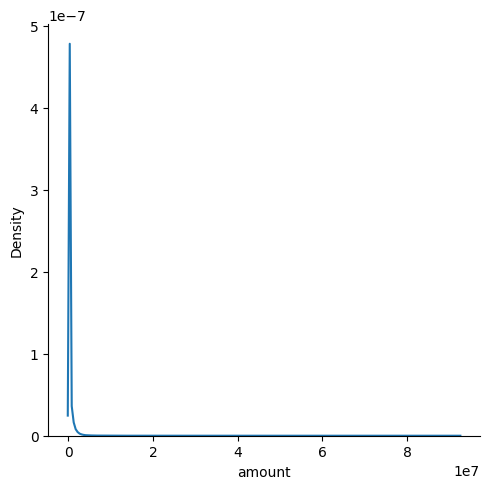

In [14]:
sns.displot(df['amount'] , kind='kde')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [17]:
df['nameOrig'].value_counts().sum()

np.int64(6362620)

In [18]:
X =  df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type']]
y = df['isFraud']


In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

## Logistic Regration model 

In [20]:
LR_model = LogisticRegression()
LR_model.fit(X_train , y_train)

c:\Users\patid\OneDrive\Desktop\Payment_froud_detaction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
LR_model_prediction = LR_model.predict(X_test)
LR_model_prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(1590655,))

In [22]:
accuracy_score(y_test , LR_model_prediction)

0.9991374622403978

In [23]:
confusion_matrix(y_test , LR_model_prediction)

array([[1588415,     195],
       [   1177,     868]])

In [24]:
print(classification_report(y_test , LR_model_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.82      0.42      0.56      2045

    accuracy                           1.00   1590655
   macro avg       0.91      0.71      0.78   1590655
weighted avg       1.00      1.00      1.00   1590655



## Decision Tree Classifier

In [25]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
DTC_model_prediction = DTC_model.predict(X_test)

In [27]:
accuracy_score(y_test , DTC_model_prediction)

0.9997422445470576

In [28]:
confusion_matrix(y_test , DTC_model_prediction)

array([[1588415,     195],
       [    215,    1830]])

In [29]:
print(classification_report(y_test , DTC_model_prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.90      0.89      0.90      2045

    accuracy                           1.00   1590655
   macro avg       0.95      0.95      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655



## SMOT algorithm

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [30]:

from imblearn.over_sampling import SMOTE

# Split before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.astype('float32')

# Apply SMOTE only on train
sm = SMOTE(random_state=42, sampling_strategy=0.4)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(X_train_res.shape, y_train_res.shape)


(6227278, 6) (6227278,)


In [31]:

from imblearn.over_sampling import SMOTE

X_test = X_test.astype('float32')

# Apply SMOTE only on train
sm = SMOTE(random_state=42, sampling_strategy=0.4)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

print(X_test_res.shape, y_test_res.shape)


(2668891, 6) (2668891,)


In [32]:
print(X_train_res)

               amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        2.677198e+04   2.752100e+04    54292.980469    7.175503e+06   
1        3.448797e+05   0.000000e+00        0.000000    3.731846e+06   
2        1.862608e+06   0.000000e+00        0.000000    3.329828e+06   
3        3.773935e+04   6.668493e+04    28945.580078    0.000000e+00   
4        3.760551e+05   2.250100e+04        0.000000    1.823504e+05   
...               ...            ...             ...             ...   
6227273  2.068089e+06   2.068089e+06        0.000000    0.000000e+00   
6227274  6.840995e+05   6.840995e+05        0.000000    0.000000e+00   
6227275  1.997066e+06   1.997066e+06        0.000000    3.799355e+05   
6227276  4.047619e+05   4.047619e+05        0.000000    0.000000e+00   
6227277  2.865669e+05   2.865669e+05        0.000000    0.000000e+00   

         newbalanceDest  type  
0          7.148731e+06   0.0  
1          4.076726e+06   1.0  
2          4.913632e+06   4.0  
3      

In [33]:
# training SMOTE
y_train_res.value_counts()

isFraud
0    4448056
1    1779222
Name: count, dtype: int64

In [34]:
# testing SMOTE
y_test_res.value_counts()

isFraud
0    1906351
1     762540
Name: count, dtype: int64

In [35]:
DTC_model_res = DecisionTreeClassifier()
DTC_model_res.fit(X_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
DTC_y_res_prediction = DTC_model_res.predict(X_test_res)

In [37]:
accuracy_score(y_test_res , DTC_y_res_prediction)

0.9955989210499792

In [38]:
confusion_matrix(y_test_res , DTC_y_res_prediction)

array([[1905562,     789],
       [  10957,  751583]])

In [39]:
print(classification_report(y_test_res , DTC_y_res_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1906351
           1       1.00      0.99      0.99    762540

    accuracy                           1.00   2668891
   macro avg       1.00      0.99      0.99   2668891
weighted avg       1.00      1.00      1.00   2668891



In [40]:
## logistic regration 

LR_model_res = LogisticRegression()
LR_model_res.fit(X_train_res , y_train_res)

c:\Users\patid\OneDrive\Desktop\Payment_froud_detaction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
LR_model_y_prediction = LR_model_res.predict(X_test_res)

In [42]:
accuracy_score(y_test_res ,LR_model_y_prediction)

0.9365646630004747

In [43]:
confusion_matrix(y_test_res ,LR_model_y_prediction)

array([[1863454,   42897],
       [ 126405,  636135]])

In [44]:
print(classification_report(y_test_res ,LR_model_y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96   1906351
           1       0.94      0.83      0.88    762540

    accuracy                           0.94   2668891
   macro avg       0.94      0.91      0.92   2668891
weighted avg       0.94      0.94      0.94   2668891



In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## XGboost

In [46]:
from xgboost import XGBClassifier

In [47]:
XGB_model = XGBClassifier(   
    n_estimators=100,       
    max_depth=6,             
    learning_rate=0.1,                    
    random_state=42,
    tree_method='hist')


XGB_model.fit(X_train_res, y_train_res)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
XGB_model_y_prediction =  XGB_model.predict(X_test_res)

In [49]:
accuracy_score(y_test_res , XGB_model_y_prediction)

0.9960406775698221

In [50]:
confusion_matrix(y_test_res , XGB_model_y_prediction)

array([[1899434,    6917],
       [   3650,  758890]])

In [51]:
print(classification_report(y_test_res , XGB_model_y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.99      1.00      0.99    762540

    accuracy                           1.00   2668891
   macro avg       0.99      1.00      1.00   2668891
weighted avg       1.00      1.00      1.00   2668891



In [53]:
## SAVE Model 
import joblib
joblib.dump(DTC_model_res , "XBC_model.pkl")

['XBC_model.pkl']